#California Real Estate Prediction

In [456]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
import numpy as np

##Data Exploration

In [457]:
#tabular overview 
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [458]:
#general infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [459]:
#shape of the dataset
print(f'(rows, columns): {df.shape}')

(rows, columns): (20640, 10)


##Data Cleaning

In [460]:
#rescaling the median_income values from original scale (in 10,000 dollars) to a normalized scale (in 1 dollar)
df['median_income'] = df['median_income'] * 10000

In [461]:
#counting empty values 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [462]:
#filling Null values with average (expected) values
average_bedrooms_per_room = (df['total_bedrooms'] / df['total_rooms']).mean()
df['total_bedrooms'] = df['total_bedrooms'].fillna(np.floor(df['total_rooms'] * average_bedrooms_per_room))

In [463]:
#viewing the ocean_proximity values
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [464]:
#replacing ocean_proximity column with numeric (binary) values
dummies= pd.get_dummies(df.ocean_proximity).astype(int)
df.drop('ocean_proximity',inplace=True,axis=1)
df = df.join(dummies)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,0,0,0,1,0


In [465]:
#calculating different data statistics 
min_price = np.min(df['median_house_value'])
max_price = np.max(df['median_house_value'])
average_price = np.round(np.mean(df['median_house_value']),decimals=2)
average_households = np.mean(df['households'])
average_income = np.round(np.mean(df['median_income']),decimals=2)
one_hour_ocean = np.sum(df['<1H OCEAN'])
inland = np.sum(df['INLAND'])
island = np.sum(df['ISLAND'])
near_bay = np.sum(df['NEAR BAY'])
near_ocean = np.sum(df['NEAR OCEAN'])


print(f'minimum price: {min_price}$')
print(f'maximum price: {max_price}$')
print(f'average price: {average_price}$')
print(f'average income: {average_income}$')
print(f'average households per block: {np.ceil(average_households)}')
print(f'locations nearer than one hour to the ocean: {one_hour_ocean}')
print(f'locations near to the bay: {near_bay}')
print(f'locations near to the ocean: {near_ocean}')
print(f'locations in the inland: {inland}')
print(f'locations on an island: {island}')

minimum price: 14999.0$
maximum price: 500001.0$
average price: 206855.82$
average income: 38706.71$
average households per block: 500.0
locations nearer than one hour to the ocean: 9136
locations near to the bay: 2290
locations near to the ocean: 2658
locations in the inland: 6551
locations on an island: 5


##Splitting the data for training and testing

In [466]:
from sklearn.model_selection import train_test_split

x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

#concat data for visualization
tdf = pd.concat([xtrain,ytrain],axis=1)

##Visualizing (training) data

<AxesSubplot:>

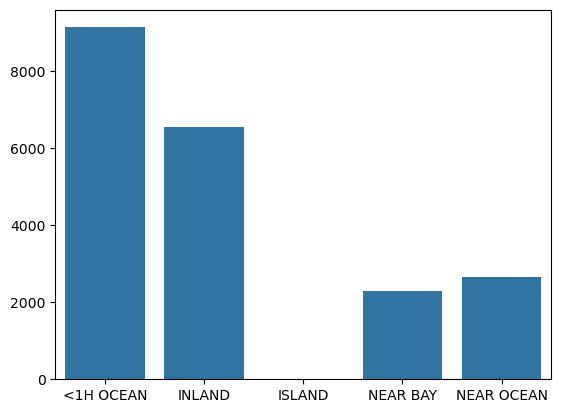

In [448]:
#counting locations
bar_data = dummies.sum()
sns.barplot(bar_data)

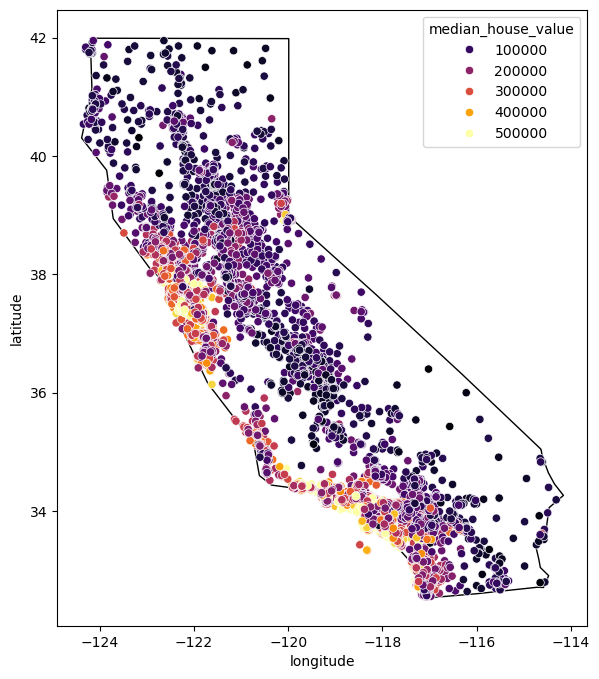

In [449]:
#california scatter map
import geopandas as gpd

#natural earth california map
california = gpd.read_file('ne_110m_admin_1_states_provinces_lakes')
california = california[california['name'] == 'California']

#scattering data on the map 
plt.figure(figsize=(15,8))
california.plot(ax=plt.gca(), color='white', edgecolor='black', zorder=0)
sns.scatterplot(x='longitude' , y='latitude', data = tdf, hue='median_house_value', zorder=1, ax=plt.gca(),palette='inferno')
plt.show()

<AxesSubplot:>

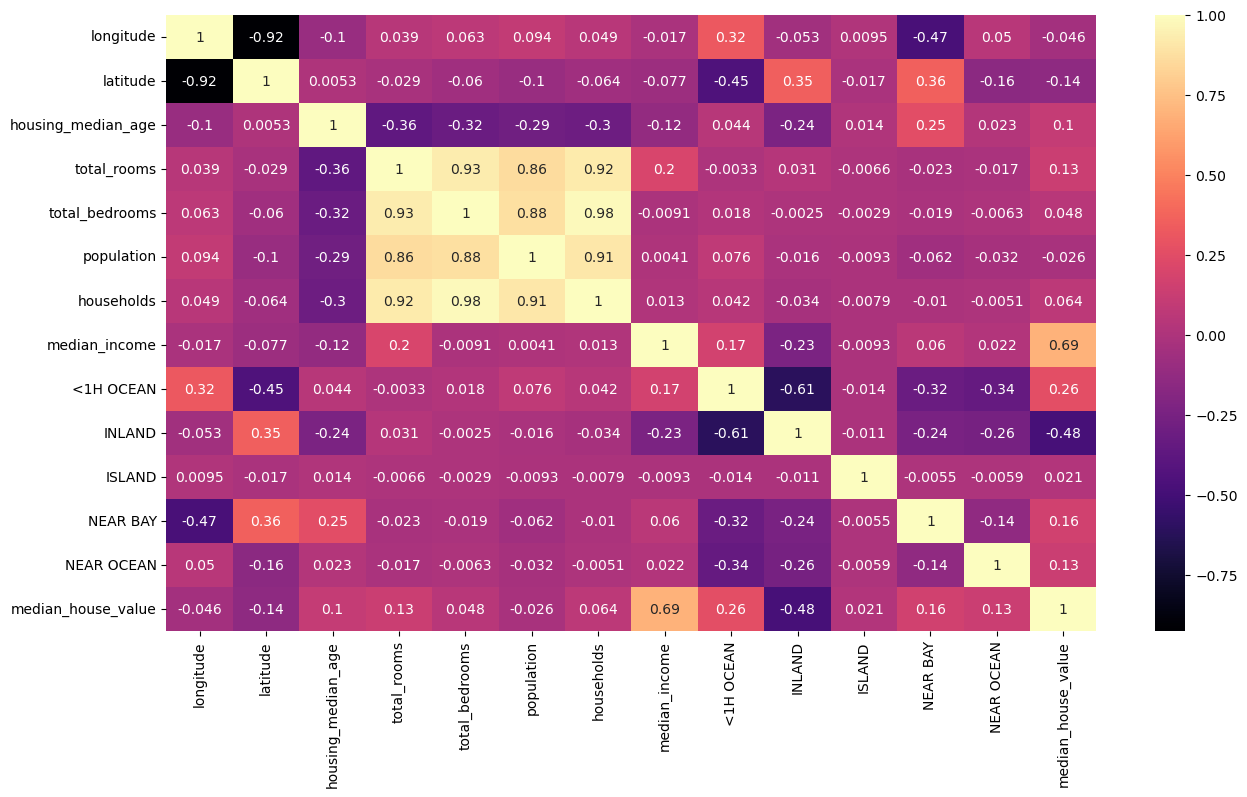

In [450]:
#correlations 
plt.figure(figsize=(15,8))
sns.heatmap(tdf.corr(), annot=True, cmap='magma')

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'<1H OCEAN'}>,
        <AxesSubplot:title={'center':'INLAND'}>,
        <AxesSubplot:title={'center':'ISLAND'}>,
        <AxesSubplot:title={'center':'NEAR BAY'}>],
       [<AxesSubplot:title={'center':'NEAR OCEAN'}>,
        <AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

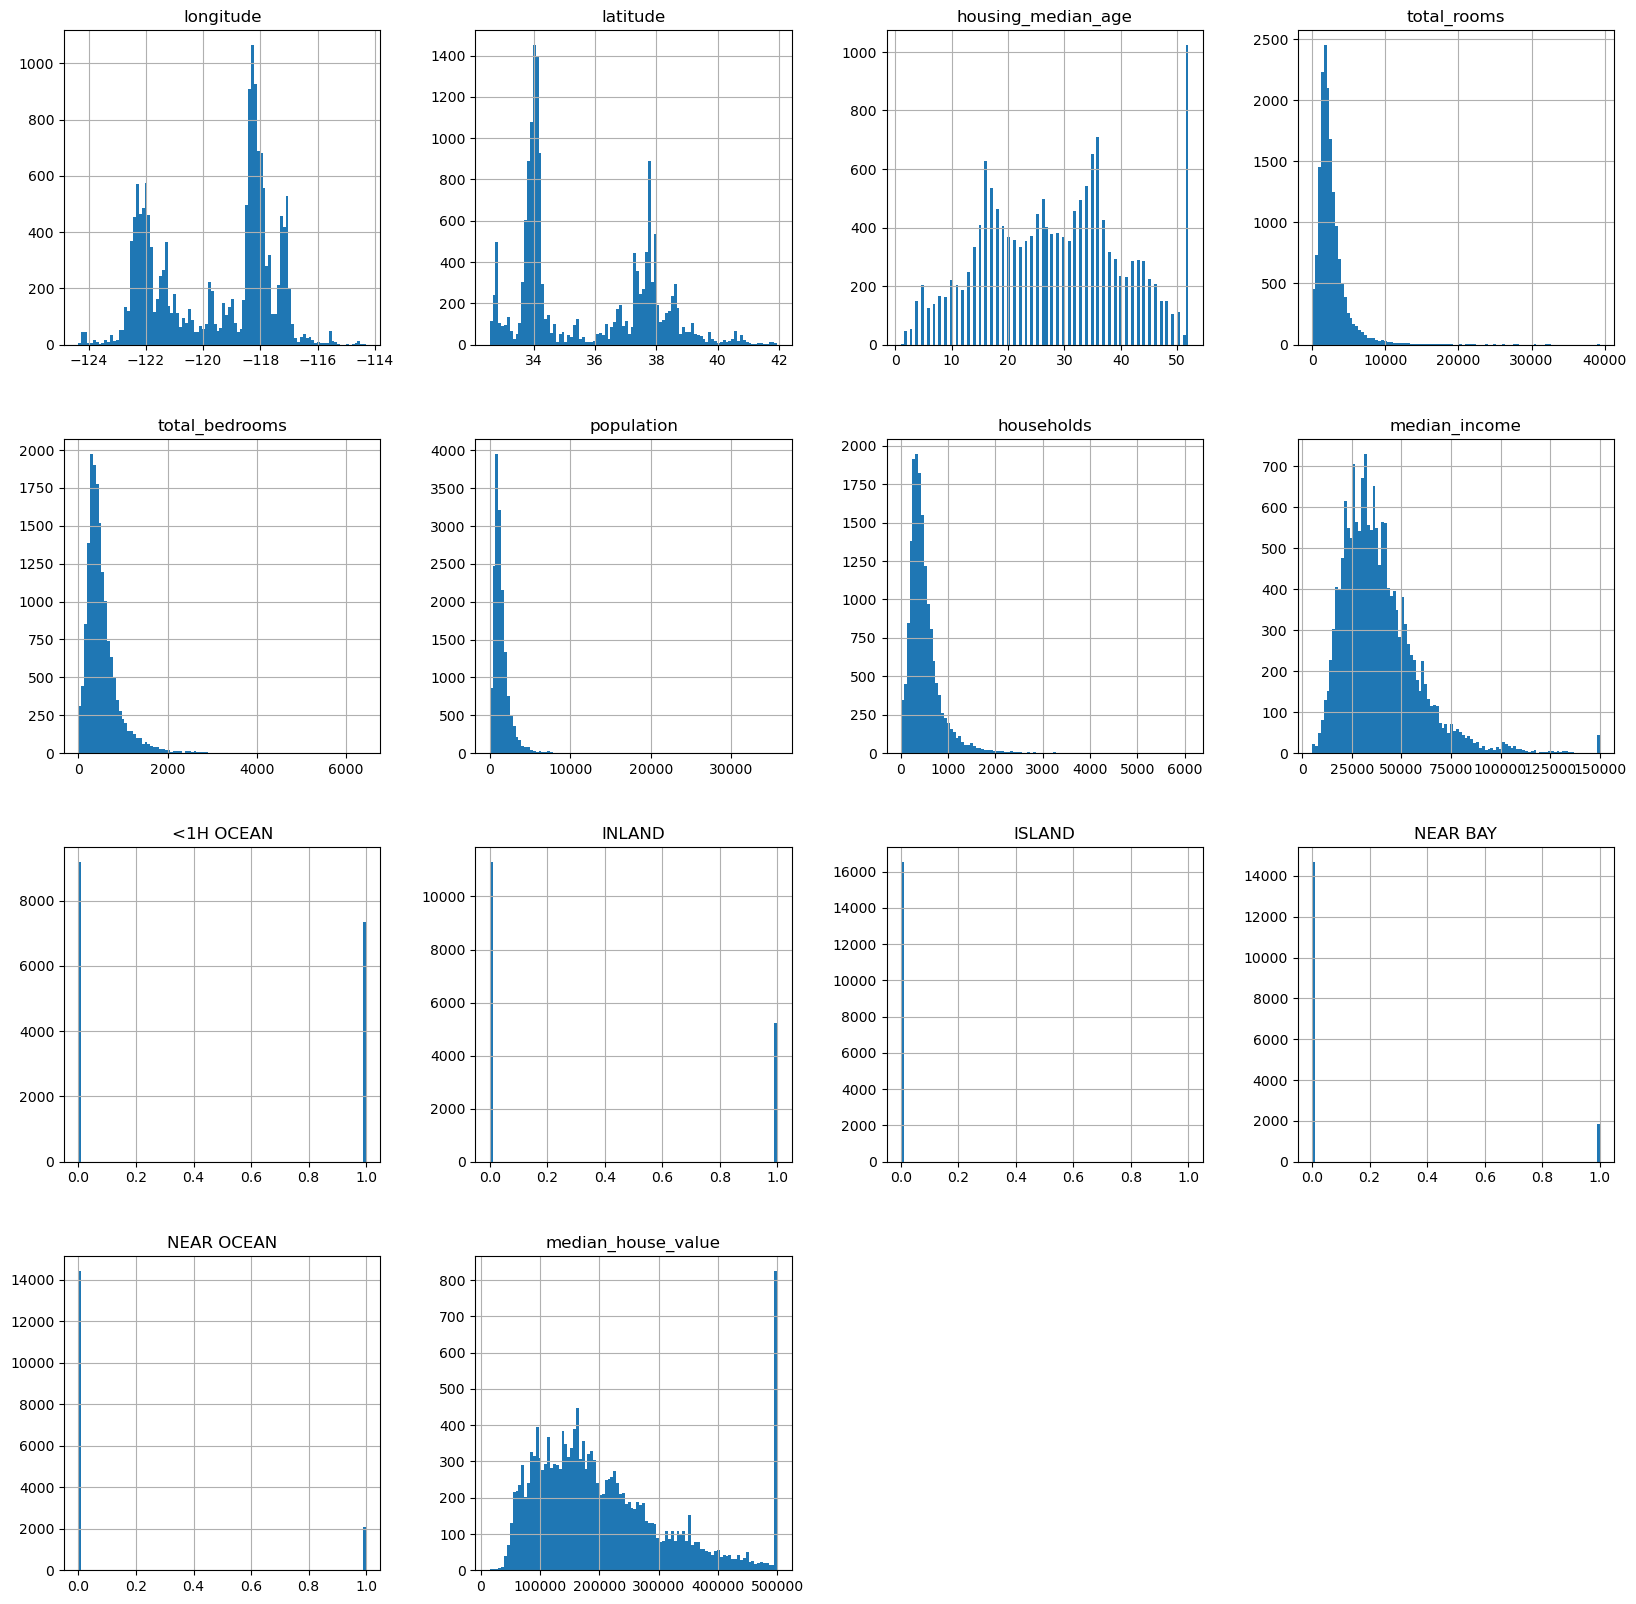

In [478]:
#histogramm
tdf.hist(bins=100, figsize=(20,20))

In [483]:
#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
print(

LinearRegression()

In [453]:
ypred = lr.predict(xtest)
ypred

array([ 42234.66842905, 143858.11345687, 294549.34974025, ...,
       439180.98341174, 120797.55240625, 183386.04993584])

In [454]:
from sklearn.metrics import mean_squared_error
pred = lr.predict(xtest)
lin_mse = mean_squared_error(ytest,pred)
lin_rmse = np.sqrt(lin_mse)
print('rmse : ',lin_rmse)

rmse :  69422.04742859528


In [455]:
lin_reg_score = lr.score(xtest,ytest)
print('R² : ',lin_reg_score )

R² :  0.6322201122547444
